# imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import librosa ## used to deal with audio files
import librosa.display

from IPython.display import Audio

# features

In [2]:

def get_features_from_audio(audio_path: str) -> list:
    """
    add your feature extraction logic here
    """
    pass


def get_Dataframe(labels_df: pd.DataFrame, target_label: str) -> pd.DataFrame:
    """
    Process audio files listed in labels_df, extract features, and return a DataFrame
    """
    feature_name = [] ## list of feature names you used
    feature_length =[] ## list of feature lengths you used
    all_features=[] ## list of all actual features values
    columns = [] ## list of columns names for the DataFrame

    for index, row in labels_df.iterrows():
        audio_path = os.path.join('../Data/', row['path'])

        if os.path.isfile(audio_path):
            features = get_features_from_audio(audio_path)
            features.append(row[target_label])
            all_features.append(features)
        else:
            print(f"File not found: {audio_path}")

    # Automatically determine feature names based on length of feature vector
    if all_features:
        for i in range(len(feature_name)):
            columns.append([f"{feature_name[i]}_{j}" for j in range(feature_length[i])])
    else:
        features_names = []

    return pd.DataFrame(all_features, columns=features_names)

In [3]:
labels_df = pd.read_csv('../Data/filtered_data_labeled.tsv', sep='\t')
labels_df.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,label
0,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687170.mp3,He associated with the Formists.,2,1,fifties,female,us,3
1,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687171.mp3,"The ""ultra accelerator"" injection gives Derric...",2,1,fifties,female,us,3
2,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687172.mp3,"Despite running as a joke, candidates have won...",2,0,fifties,female,us,3
3,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687173.mp3,Stoner also guest-starred in the television dr...,2,0,fifties,female,us,3
4,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687174.mp3,Rainelle was named for the Raine family.,2,0,fifties,female,us,3


In [4]:
audio_path = '../Data/common_voice_en_19687170.mp3'
y, sr = librosa.load(audio_path)

In [5]:
Audio(data=y, rate=sr)

<function matplotlib.pyplot.show(close=None, block=None)>

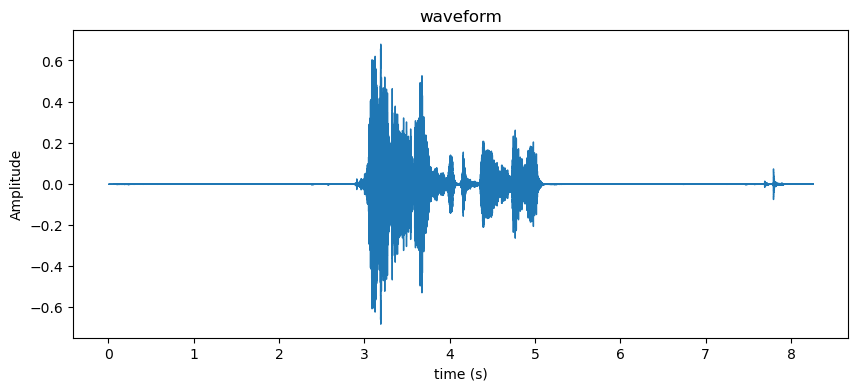

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('waveform')
plt.xlabel('time (s)')
plt.ylabel("Amplitude")
plt.show

In [7]:
y_unsilenced = []
time_intervals = librosa.effects.split(y, top_db=25, ref=np.max).tolist()
for start, end in time_intervals:
    y_unsilenced += y.tolist()[start:end+1]
y_unsilenced = np.array(y_unsilenced)

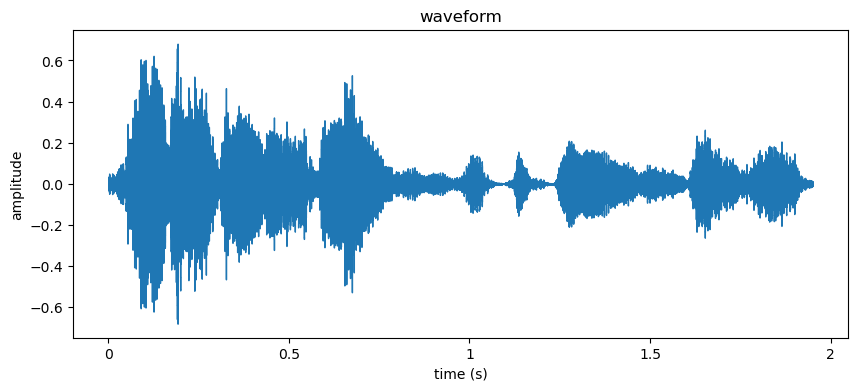

In [8]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_unsilenced, sr=sr)
plt.title('waveform')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

In [9]:
Audio(data=y_unsilenced, rate=sr)

In [11]:
wav = labels_df[labels_df['path'].str.contains('mp3')]
wav.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,label
0,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687170.mp3,He associated with the Formists.,2,1,fifties,female,us,3
1,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687171.mp3,"The ""ultra accelerator"" injection gives Derric...",2,1,fifties,female,us,3
2,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687172.mp3,"Despite running as a joke, candidates have won...",2,0,fifties,female,us,3
3,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687173.mp3,Stoner also guest-starred in the television dr...,2,0,fifties,female,us,3
4,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687174.mp3,Rainelle was named for the Raine family.,2,0,fifties,female,us,3
